<a href="https://colab.research.google.com/github/Neeraj6maths/airbnb_EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
original_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone projects/EDA/Airbnb Bookings Analysis/Copy of Airbnb NYC 2019.csv')
df1 = original_df.copy()

In [136]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [137]:
df1.shape

(48895, 16)

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [139]:
df1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Let us first understand the meaning of each columns

In [140]:
len(df1['id'].unique())   # all ids are unique

48895

In [141]:
df1['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [142]:
type(df1['last_review'][0])

str

In [143]:
df1['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

In [144]:
len(df1['host_id'].unique())  # there are few unique host ids bcz of the repetition of ids due to muliple listings by same host.

37457

## Cleaning data

#### (1) Removing duplicate rows

In [145]:
df1[df1.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


No duplicate rows are there.

#### (2) Converting columns to appropriate data types 

In [146]:
df1['last_review'] = pd.to_datetime(df1['last_review'], format = '%Y-%m-%d')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [147]:
df1.head()   # Nat is 'not a time' missing value in time variable

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### (3) Removing unwanted columns

Since, we have host_ids to uniqely identify each host, hence we can remove host name column. \
Also the ids of listings doesnot provide any insight, hence we can remove that column too.

In [148]:
df1.drop(columns=['id','host_name'], inplace = True)

#### (4) Number of missing values

In [149]:
df1.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Lots of missing  values in last_review and reviews_per_month.

In [150]:
df1[df1['number_of_reviews'] ==0].head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,Huge 2 BR Upper East Cental Park,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,Clean and Quiet in Brooklyn,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,Country space in the city,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365


Listings for which number_of_reviews are equal to 0, have NaT last_review and NaN reviews_per_month, which makes sense. We can replace that with 0

In [151]:
df1.fillna({'last_review':0,'reviews_per_month':0}, inplace = True)

In [152]:
df1.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

#### (4) Outliers

In [153]:
df1.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


There are few listings that have price = 0

In [154]:
df1[df1['price'] == 0].shape[0]

11

There are 11 rows with price = 0.

There are few listings that have minimum nights to stay > 365.

In [155]:
df1[df1['minimum_nights'] >= 365]['minimum_nights'].unique()

array([ 365,  370, 1000, 1250,  500,  480,  999,  366,  400])

There are minimum nights required to make booking upto 1250 nights.

## EDA

In [156]:
df1.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0


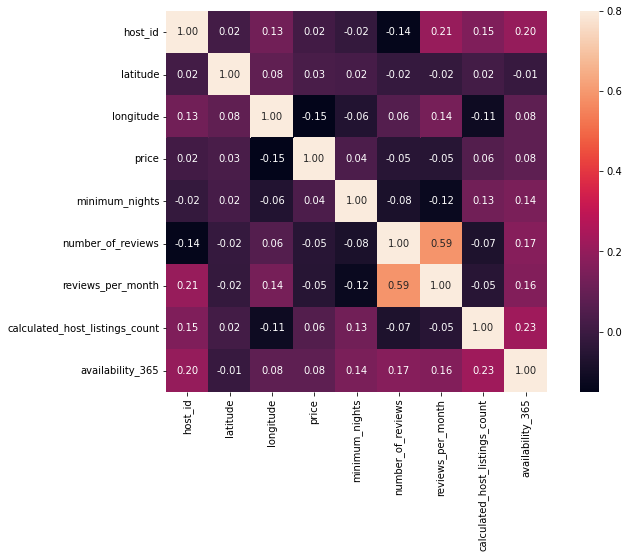

In [157]:
corr_df = df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sbn.heatmap(corr_df,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

No strong correlation between any numerical columns, except for reviews and reviews per month, but they represent same thing so we can ignore that.

Q1) No. of listings in each neighbourhood group?

In [158]:
df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

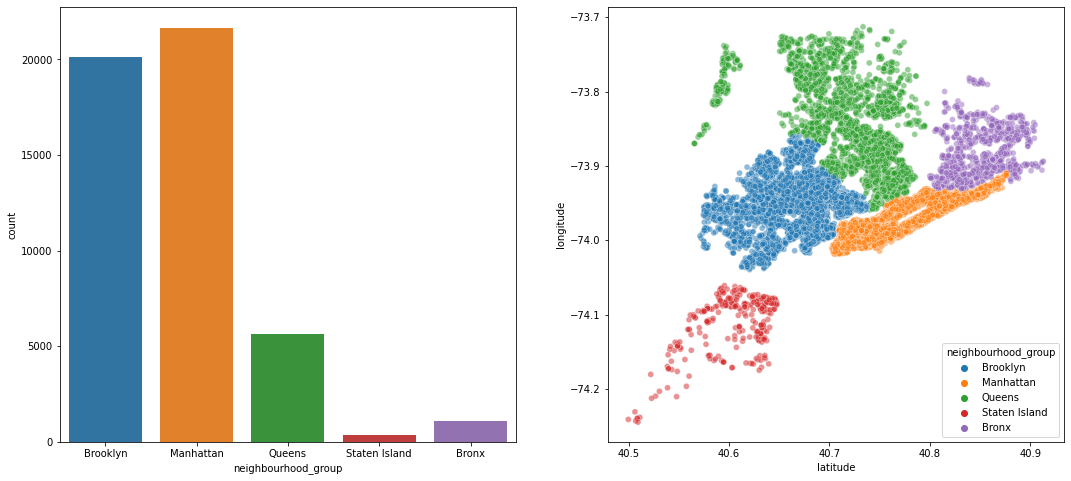

In [159]:

fig,axes = plt.subplots(1,2, figsize = (18,8))
sbn.countplot(ax = axes[0],x = 'neighbourhood_group', data = df1)
sbn.scatterplot(ax = axes[1],data = df1, x = 'latitude',y = 'longitude', hue = 'neighbourhood_group',alpha = 0.5)
plt.show()

Most number of listings are in Manhattan and Brooklyn.\
Least number oflistings are in Staten Island and Bronx.

Also, room density is uniform in Brooklyn and Manhattan.

Q) Price wise distribution of each neighbourhood group?

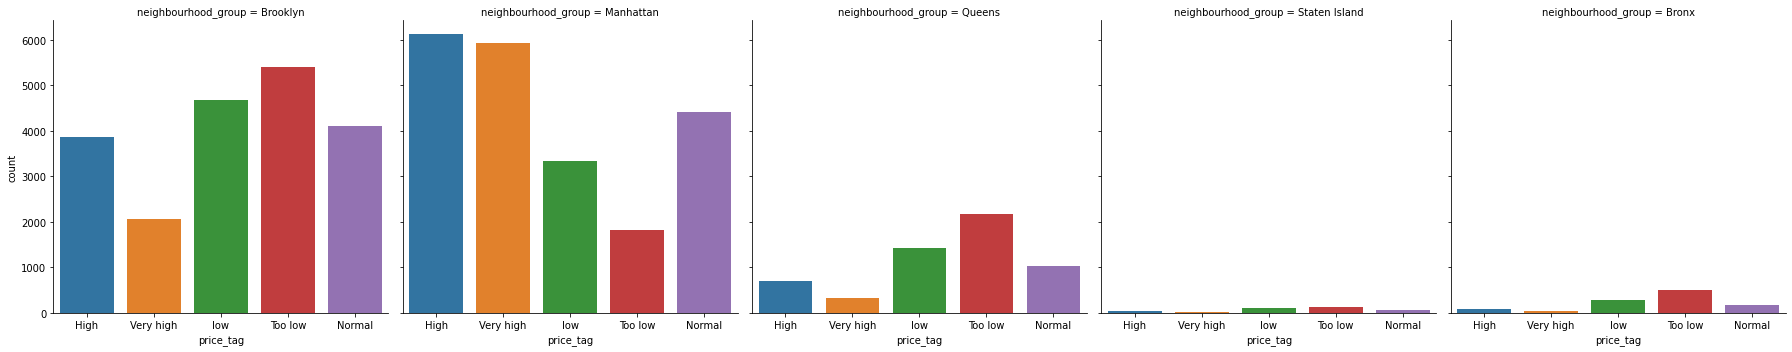

In [160]:
q1 = np.quantile(df1['price'],0.2)
q2 = np.quantile(df1['price'],0.4)
q3 = np.quantile(df1['price'],0.6)
q4 = np.quantile(df1['price'],0.8)
q5 = np.quantile(df1['price'],1.0)

def price_tag(x):
  if x <= q1:
    return 'Too low'
  elif x <= q2:
    return 'low'
  elif x <= q3:
    return 'Normal'
  elif x <= q4:
    return 'High'
  else:
    return  'Very high'

df1['price_tag'] = df1['price'].apply(price_tag)

sbn.catplot(data = df1, x = 'price_tag',kind = 'count',col = 'neighbourhood_group')

In [161]:
# Bronx_df = df1[df1['neighbourhood_group'] == 'Bronx']
# Manhattan_df = df1[df1['neighbourhood_group'] == 'Manhattan']
# Queens_df = df1[df1['neighbourhood_group'] == 'Queens']
# StatenIsland_df = df1[df1['neighbourhood_group'] == 'Staten Island']
# Brooklyn_df = df1[df1['neighbourhood_group'] == 'Brooklyn']

Host wise analysis

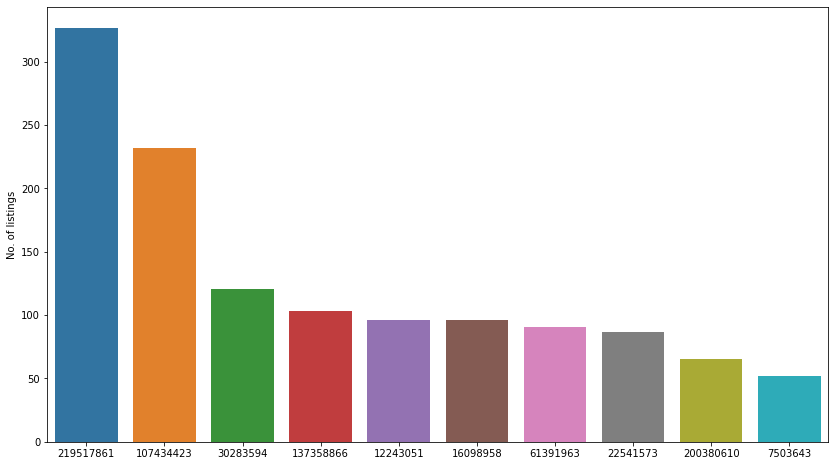

In [179]:
plt.figure(figsize = (14,8))
top10_host = pd.DataFrame(df1['host_id'].value_counts().head(10)).rename(columns = {'host_id':'No. of listings'})
sbn.barplot(x = top10_host.index, y = top10_host['No. of listings'], order = top10_host.sort_values('No. of listings', ascending = False).index)

Find top 10 most reviewed hosts

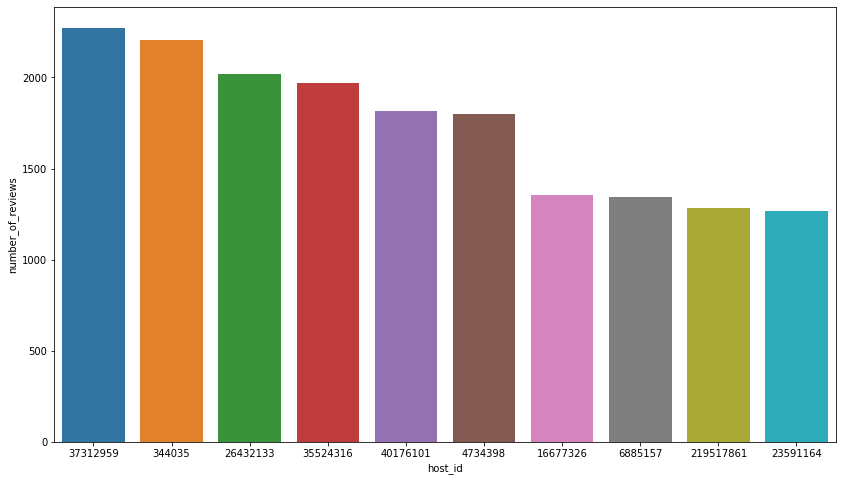

In [189]:
plt.figure(figsize = (14,8))
grouped = df1.groupby('host_id')
top10_reviewed_host = pd.DataFrame(grouped['number_of_reviews'].agg('sum').sort_values(ascending = False).head(10))
sbn.barplot(x = top10_reviewed_host.index, y = top10_reviewed_host['number_of_reviews'], order = top10_reviewed_host.sort_values('number_of_reviews', ascending = False).index)
plt.show()